## Les données

Nous utiliserons des données provenant d'un ensemble de données Kaggle :

https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

#### Colonnes Features (caractéristiques)
    
* age : âge du bénéficiaire principal
* sex : sexe du souscripteur de l'assurance, féminin ou masculin
* bmi : Indice de masse corporelle (IMC), fournissant une compréhension du poids corporel, en indiquant si le poids est relativement élevé ou faible par rapport à la taille. Indice objectif du poids corporel (kg/m²) basé sur le rapport taille/poids, idéalement compris entre 18,5 et 24,9
* children : Nombre d'enfants couverts par l'assurance santé / Nombre de personnes à charge
* smoker : Tabagisme
* region : Zone résidentielle du bénéficiaire aux États-Unis : nord-est, sud-est, sud-ouest, nord-ouest
* charges : Coûts médicaux individuels facturés par l'assurance santé

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# df = pd.read_csv('insurance.csv')

# lecture à partir de Github pour pouvoir éxécuter le notebook sans se soucier d'importer le fichier csv
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv'
df = pd.read_csv(url)

## Exploration des données

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Remplacement des données textuelles par des données numériques

On modifie les features textuelles par des valeurs numériques :    
* sex : 0 pour 'male' et 1 pour 'female'
* smoker : 0 pour 'no' et 1 pour 'yes'
* region : 0 pour 'northeast', 1 pour 'southeast', 2 pour 'southwest' et 3 pour 'northwest'

On remplace aussi les valeurs de bmi par des catégories 'bas', 'normal' et 'élevé'

In [122]:
# Dictionnaire de remplacement "sex"
remplacementSex = {'male': 0, 'female': 1}

# Dictionnaire de remplacement "smoker"
remplacementSmoker = {'no': 0, 'yes': 1}

# Dictionnaire de remplacement "region"
remplacementRegion = {'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest': 3}

# Remplacer les valeurs textuelles par des int
df['sex'] = df['sex'].replace(remplacementSex)
df['smoker'] = df['smoker'].replace(remplacementSmoker)
df['region'] = df['region'].replace(remplacementRegion)

# Plages de valeurs et catégories pour les "bmi"
# 0 : bmi bas
# 1 : bmi normal
# 2 : bmi élevé

conditions = [
    df["bmi"] < 18.5,
    (df["bmi"] >= 18.5) & (df["bmi"] <= 24.9),
    df["bmi"] > 24.9
]
choices = ["0", "1", "2"]

# Ajouter une colonne catégorisée
df["bmi"] = np.select(conditions, choices, default="unknown")

<ipython-input-122-39de696a80b5>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace(remplacementSex)
<ipython-input-122-39de696a80b5>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace(remplacementSmoker)
<ipython-input-122-39de696a80b5>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_

In [123]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,2,0,1,2,16884.92400
1,18,0,2,1,0,1,1725.55230
2,28,0,2,3,0,1,4449.46200
3,33,0,1,0,0,3,21984.47061
4,32,0,2,0,0,3,3866.85520


### Visualisation des données

In [240]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.494768,0.500160,0.0000,0.00000,0.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.486547,1.104915,0.0000,1.00000,1.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


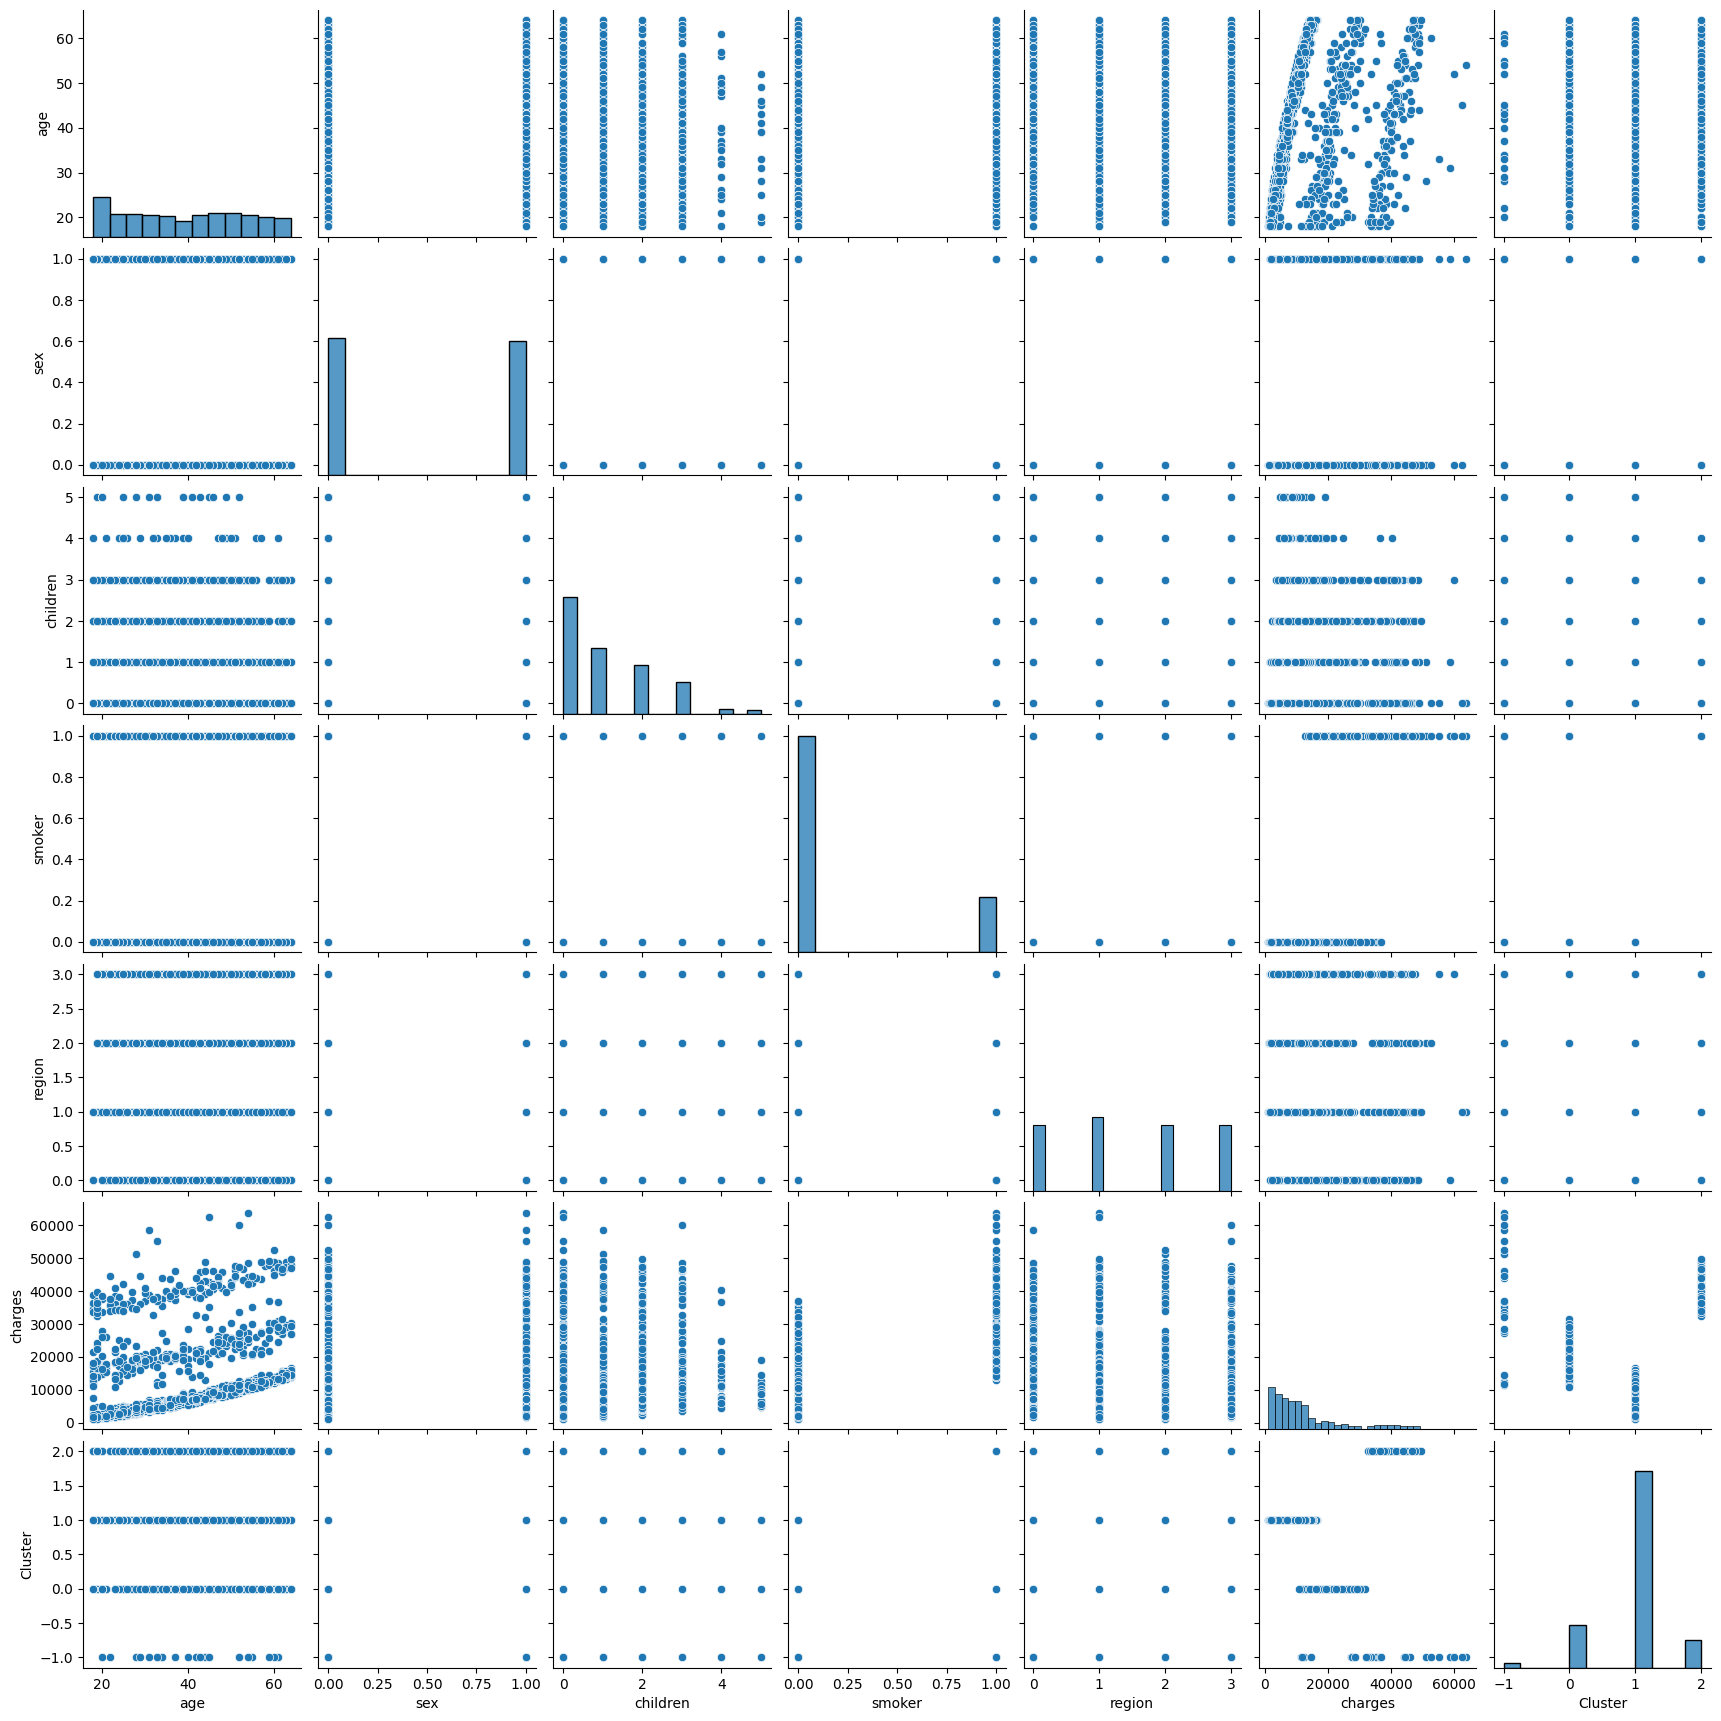

In [33]:
sns.pairplot(df);

Il semble y avoir un lien entre l'age, si le patient fume et les charges. Visualisons la distribution de ces features.

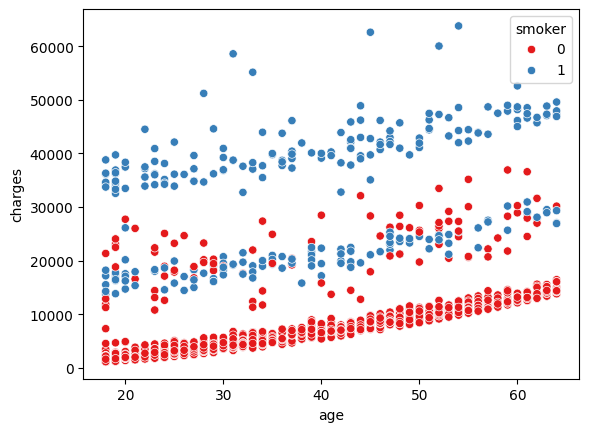

In [124]:
sns.scatterplot(x='age',y='charges', hue="smoker", palette="Set1", data=df);

Nous distinguons 3 groupes de charges. Les patients non fumeurs appartient soit à la catégorie "basse" ou "moyenne" tandis que les fumeurs sont tous dans la "moyenne" ou "haute".

Il y a peut être également un lien avec l'indice bmi à explorer.

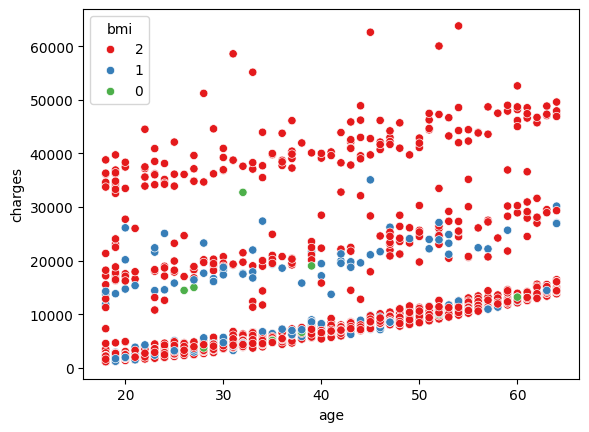

In [125]:
sns.scatterplot(x='age',y='charges', hue="bmi", palette="Set1", data=df);

Les assurés ayant un indice bmi "normal" sont dans le groupe "bas" et "moyen" exclusivement. La catégorie la plus honéreuse est exclusivement peuplée d'assurés ayant un bmi élevé.

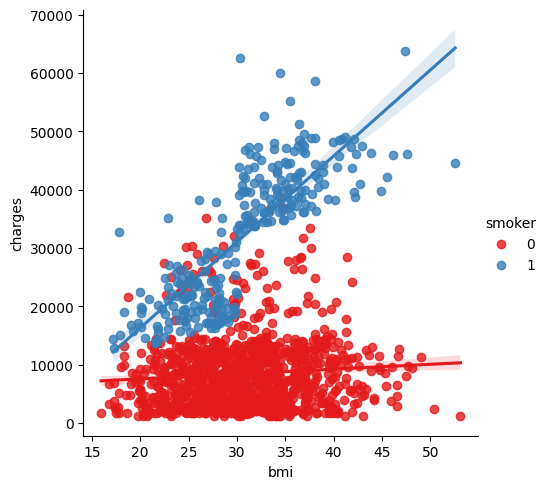

In [118]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set1')

<Axes: xlabel='age', ylabel='charges'>

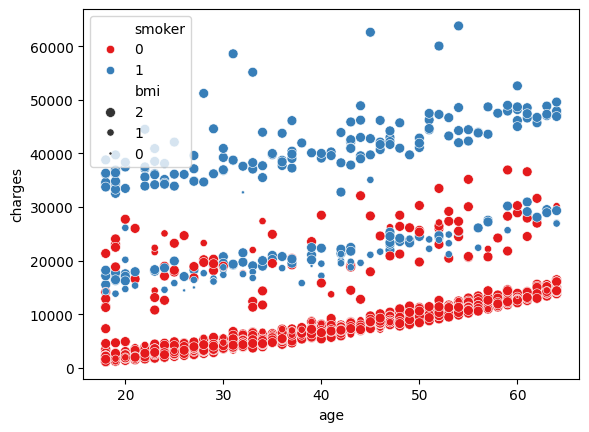

In [126]:
sns.scatterplot(
    data=df,
    x="age",
    y="charges",
    size="bmi",          # Taille des points pour la feature BMI
    hue="smoker",        # Couleur des points pour la feature "smoker"
    sizes=(5, 50),     # Taille minimale et maximale des points
    palette="Set1"   # Palette de couleurs pour fumeur/non-fumeur
)

En croisant les données bmi et smoker on s'aperçoit que les assurés étant dans la catégorie la plus honéreuse sont à la fois fumeurs et ont un bmi élevé.

Les autres features sex, children et region semblent avoir un impact moins significatif sur les coûts des assurances.

<ipython-input-47-95d19748efa7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='charges',data=df, palette="Set1")


<Axes: xlabel='sex', ylabel='charges'>

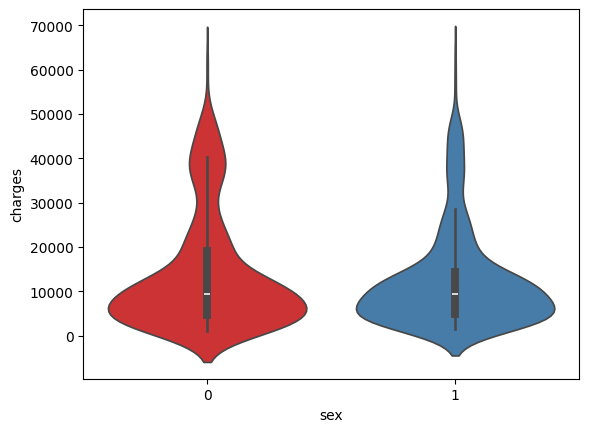

In [47]:
sns.violinplot(x='sex', y='charges',data=df, palette="Set1")

<ipython-input-48-7109aafa6660>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='children', y='charges',data=df, palette="Set2")


<Axes: xlabel='children', ylabel='charges'>

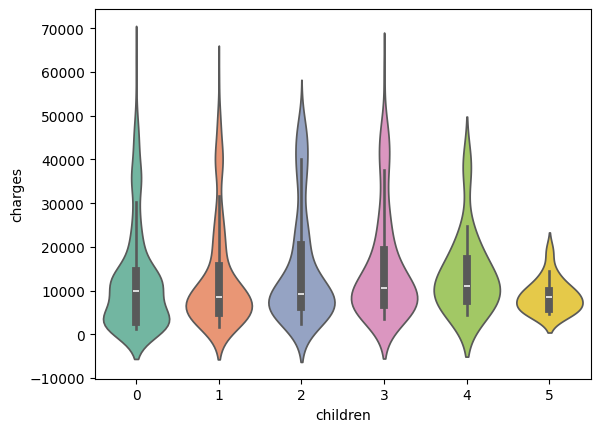

In [48]:
sns.violinplot(x='children', y='charges',data=df, palette="Set2")

On note cependant que le cout des assurances diminue en fonction du nombre d'enfants.

<ipython-input-49-2e8cdaa17b51>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='region', y='charges',data=df, palette="Set3")


<Axes: xlabel='region', ylabel='charges'>

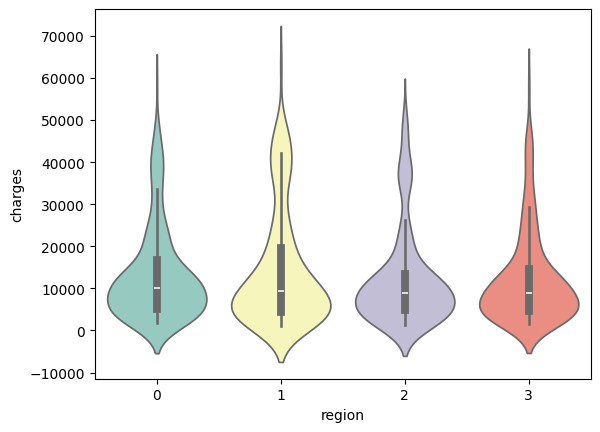

In [49]:
sns.violinplot(x='region', y='charges',data=df, palette="Set3")

## Transformation des données, répartition des jeux entrainement/test et mise à l'échelle

On repart des données brutes pour récupérer les valeurs de bmi.

In [130]:
# df = pd.read_csv('insurance.csv')

# lecture à partir de Github pour pouvoir éxécuter le notebook sans se soucier d'importer le fichier csv
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv'
df = pd.read_csv(url)

# Dictionnaire de remplacement "sex"
remplacementSex = {'male': 0, 'female': 1}

# Dictionnaire de remplacement "smoker"
remplacementSmoker = {'no': 0, 'yes': 1}

# Dictionnaire de remplacement "region"
remplacementRegion = {'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest': 3}

# Remplacer les valeurs textuelles par des int
df['sex'] = df['sex'].replace(remplacementSex)
df['smoker'] = df['smoker'].replace(remplacementSmoker)
df['region'] = df['region'].replace(remplacementRegion)

<ipython-input-130-2ad610bfa6c2>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace(remplacementSex)
<ipython-input-130-2ad610bfa6c2>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace(remplacementSmoker)
<ipython-input-130-2ad610bfa6c2>:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_

In [101]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


### Transformation des données

In [102]:
X = df.drop('charges',axis=1) #on retire les charges de nos features car ce sera notre label à prédire
y = df['charges'] #nos labels à prédire seront la feature charges

In [103]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,2
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


### Répartition entrainement/test

On sépare les données en 70% jeu d'entrainement et 30% jeu de test.

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=55)

### Mise à l'échelle

On met toutes les données à l'échelle avant de les passer au modèle.

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
X_train.shape

(936, 6)

In [107]:
X_test.shape

(402, 6)

##Création du modèle

Le modèle sera constitué d'une couche d'entrée de 3 neurones correspondant au nombre de features, 3 couches cachées et une couche de sortie correspondant à la feature "charges" à prédire.

S'agissant d'un problème de régression nous utiliserons l'optimizer 'rmsprop' et la fonction de perte 'mse'.

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(6,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse') #adam ou rmsprop

## Entrainement du modèle

In [109]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=150)

Epoch 1/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 303501664.0000 - val_loss: 327213664.0000
Epoch 2/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 323008960.0000 - val_loss: 327126720.0000
Epoch 3/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 335125888.0000 - val_loss: 326955040.0000
Epoch 4/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 306204608.0000 - val_loss: 326622016.0000
Epoch 5/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 332868672.0000 - val_loss: 326065888.0000
Epoch 6/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 294414464.0000 - val_loss: 325214976.0000
Epoch 7/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 331494528.0000 - val_loss: 323942336.0000
Epoch 8/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 340530560.0000 - val_loss: 322034240.0000
Epoch 9/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 326242624.0000 - val_loss: 319301984.0000
Epoch 10/150
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 309777088.0000 - val_loss: 3156

In [90]:
losses = pd.DataFrame(model.history.history)

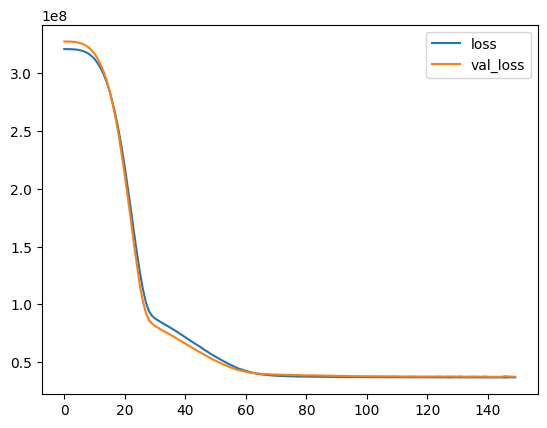

In [91]:
losses.plot();

## Evaluation du modèle

In [110]:
training_score = model.evaluate(X_train,y_train.values,verbose=0)
test_score = model.evaluate(X_test,y_test.values,verbose=0)

In [111]:
training_score

35626840.0

In [112]:
test_score

36222812.0

In [113]:
test_predictions = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [114]:
pred_df = pd.DataFrame(y_test.values,columns=['Test Y'])
test_predictions = pd.Series(test_predictions.reshape(402,))

pred_df = pd.concat([pred_df,test_predictions],axis=1)

pred_df.columns = ['y_test','Predictions']

pred_df

,y_test,Predictions
0,6059.17300,7307.704590
1,10214.63600,11278.500000
2,1625.43375,1102.157349
3,34472.84100,28335.417969
4,11842.62375,11396.815430
...,...,...
397,4320.41085,7236.661133
398,4185.09790,4303.380371
399,9748.91060,17030.140625
400,13880.94900,13558.451172


In [115]:
pred_df['Error'] = pred_df['y_test'] - pred_df['Predictions']

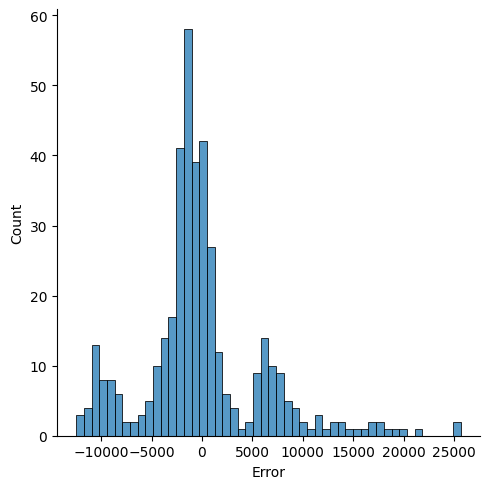

In [116]:
sns.displot(pred_df['Error'],bins=50)

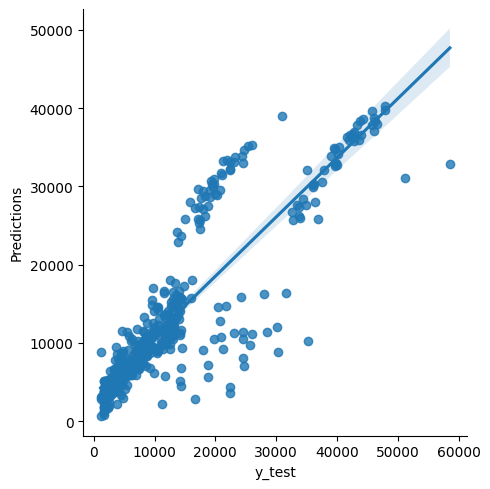

In [127]:
sns.lmplot(x = 'y_test', y = 'Predictions', data=pred_df)

Il apparait un écart significatif pour un groupe compris entre 15 000 et 30 000 correspondant aux couts d'assurances moyens : nos prédictions sont trop hautes de 10 000.

## Variation - Séparation des données en 3 clusters de coût et regression sur le cluster "moyen"

On distingue 3 groupes de charges en fonction de l'age des assurés :


*   Groupe "low cost"
*   Groupe "medium cost"
*   Groupe "high cost"

Tentons de les dissocier par clustering. On va utiliser la méthode des k-means pour identifier les groupes automatiquement. Cette méthode est la plus communement utilisée mais peut ne pas présenter de bons résultats sur des groupes non sphériques comme c'est le cas ici.



<Axes: xlabel='charges', ylabel='age'>

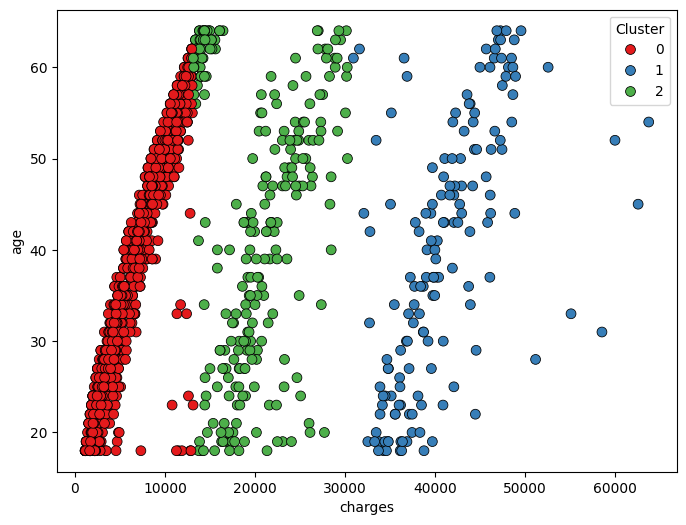

In [242]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Appliquer k-means
X = df[["age", "charges"]]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# Séparer les groupes en DataFrames
df_lowcost = df[df["Cluster"] == 0]
df_mediumcost = df[df["Cluster"] == 1]
df_highcost = df[df["Cluster"] == 2]

# Visualiser les groupes
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="charges",
    y="age",
    hue="Cluster",
    palette="Set1",
    s=50,
    edgecolor="k")

La méthode des k-moyens n'apparait pas être adaptée pour notre problème. En effet les 3 groupes ne sont pas sphériques donc le résultat n'est pas idéal (nous avons des valeurs du groupe 1 qui sont rattachées au groupe 0 sur le graphe ci-dessus).

Comme les groupes sont plutôt denses, essayons la méthode DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

<Axes: xlabel='charges', ylabel='age'>

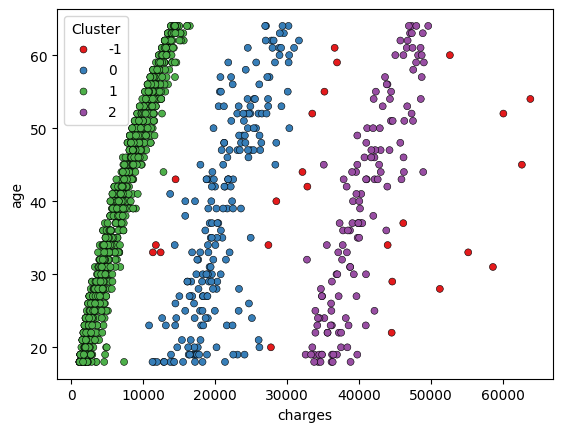

In [131]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["age", "charges"]])

# Appliquer DBSCAN
# eps : détermine la proximité nécessaire entre des points pour les considérer dans le même cluster.
# min_samples : définit le nombre minimum de voisins requis pour qu'un point soit un "nœud" dense.

dbscan = DBSCAN(eps=0.30, min_samples=8)  # bons résultats avec eps=0.4, min_samples=20
df["Cluster"] = dbscan.fit_predict(X_scaled)

# Séparer les groupes en DataFrames
clusters = df["Cluster"].unique()
dataframes = {cluster: df[df["Cluster"] == cluster] for cluster in clusters if cluster != -1}  # Exclure les points bruités (-1)

# Visualiser les clusters
sns.scatterplot(
    data=df,
    x="charges",
    y="age",
    hue="Cluster",
    palette="Set1",
    s=25,
    edgecolor="k"
)

On constate une net amélioration du clustering :      
* Cluster 1 (vert) : les contrats low cost
* Cluster 0 (bleu) : les contrats medium cost
* Cluster 2 (violet) : les contrats high cost

Les valeurs en rouges sont considérés comme du bruit et ne seront plus prises en compte par la suite.

In [132]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Cluster
0,19,1,27.900,0,1,2,16884.92400,0
1,18,0,33.770,1,0,1,1725.55230,1
2,28,0,33.000,3,0,1,4449.46200,1
3,33,0,22.705,0,0,3,21984.47061,0
4,32,0,28.880,0,0,3,3866.85520,1


In [133]:
# Séparer les groupes en DataFrames

df_lowcost = df[df["Cluster"] == 1]
df_mediumcost = df[df["Cluster"] == 0]
df_highcost = df[df["Cluster"] == 2]

### Regression sur le cluster des coûts "moyens"

In [134]:
X = df_mediumcost.drop('charges',axis=1)
X = X.drop('Cluster',axis=1)
y = df_mediumcost['charges']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=55)

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
X_train.shape

(146, 6)

In [136]:
X_test.shape

(63, 6)

In [145]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=16,epochs=600)

Epoch 1/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 476725408.0000 - val_loss: 444640544.0000
Epoch 2/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 494471104.0000 - val_loss: 444604288.0000
Epoch 3/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 491386400.0000 - val_loss: 444551296.0000
Epoch 4/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 478300320.0000 - val_loss: 444478400.0000
Epoch 5/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 451205408.0000 - val_loss: 444380384.0000
Epoch 6/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 462211456.0000 - val_loss: 444267424.0000
Epoch 7/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 465804704.0000 - val_loss: 444114432.0000
Epoch 8/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 461092384.0000 - val_loss: 443940608.0000
Epoch 9/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 464104096.0000 - val_loss: 443723712.0000
Epoch 10/600
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 475075680.0000 - val_loss: 443

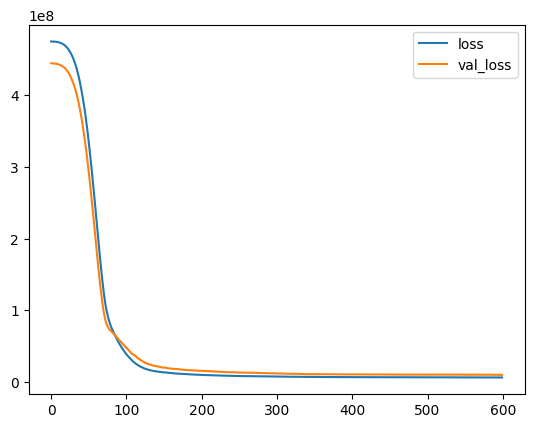

In [146]:
losses = pd.DataFrame(model.history.history)
losses.plot();

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


<ipython-input-147-54619f9075a2>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_df['Error'],bins=50)


<Axes: xlabel='Error', ylabel='Density'>

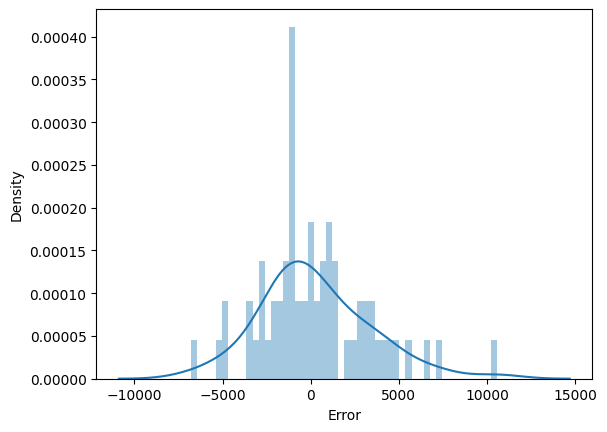

In [147]:
test_predictions = model.predict(X_test)

pred_df = pd.DataFrame(y_test.values,columns=['Test Y'])
test_predictions = pd.Series(test_predictions.reshape(63,))

pred_df = pd.concat([pred_df,test_predictions],axis=1)

pred_df.columns = ['y_test','Predictions']

pred_df['Error'] = pred_df['y_test'] - pred_df['Predictions']

sns.distplot(pred_df['Error'],bins=50)

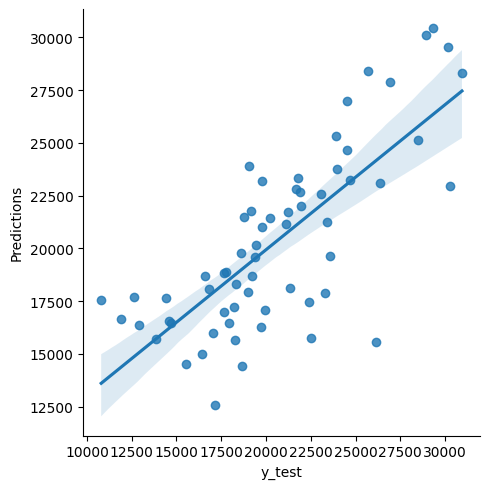

In [148]:
sns.lmplot(x = 'y_test', y = 'Predictions', data=pred_df)